In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X=df.drop('species',axis=1)
Y=df['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
y_train=le.fit_transform(y_train)

In [ ]:
y_test=le.transform(y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score found
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# You can also get the best estimator
best_model = grid_search.best_estimator_

# And evaluate it on the test set
test_accuracy = best_model.score(x_test, y_test)
print("Test set accuracy with best model: ", test_accuracy)

Best parameters found:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}
Best cross-validation accuracy:  0.9416666666666668
Test set accuracy with best model:  1.0


In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

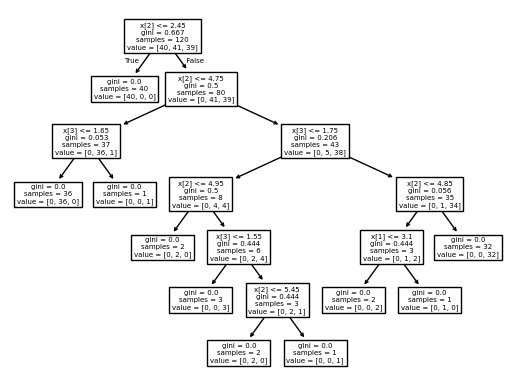

In [ ]:
from sklearn.tree import plot_tree
tree=plot_tree(model)